In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Question: 
# What faculty position request type has the highest number of unbudgeted positions per year?

In [16]:
# Read in dataset
faculty_raw = pd.read_csv('DOPCCRFFacultyStaffP_DATA_LABELS_2024-12-03_1857.csv')
faculty_raw

,recordid,position_request_timestamp,postyp,approve,fiscalyr,hirefte,clineft,rescheft,edueft,admineft,...,qualify___99,qualothr,align,strtarea___1,strtarea___2,strtarea___3,strtarea___4,strtarea___5,strtarea___6,strtarea___7
0,3001,1/26/2023 11:33,Replacement,Yes,2023.0,1.0,100,0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
1,3002,1/25/2023 21:24,New,No,2024.0,1.0,80,20,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
2,3004,1/27/2023 10:24,Replacement,Yes,2023.0,1.0,80,20,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
3,3005,1/27/2023 11:01,New,No,2024.0,1.0,80,20,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
4,3007,2/3/2023 16:05,Replacement,Yes,2023.0,1.0,70,30,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,3455,11/15/2024 14:15,New,No,NaN,1.0,80,0,20.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
292,3457,11/19/2024 9:15,New,No,NaN,1.0,80,0,20.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
293,3459,11/19/2024 16:30,New,No,NaN,1.0,50,0,0.0,50.0,...,0,NaN,NaN,0,0,0,0,0,0,0
294,3460,11/22/2024 13:36,Replacement,Yes,2025.0,1.0,80,0,10.0,10.0,...,0,NaN,NaN,0,0,0,0,0,0,0


In [17]:
#print column headers to determine columns to drop
print(faculty_raw.columns)

Index(['recordid', 'position_request_timestamp', 'postyp', 'approve',
       'fiscalyr', 'hirefte', 'clineft', 'rescheft', 'edueft', 'admineft',
       'rank___1', 'rank___2', 'rank___3', 'rank___4', 'rank___5',
       'stafflvl___1', 'stafflvl___2', 'stafflvl___3', 'stafflvl___4',
       'prfsfee', 'extgrant', 'endow', 'labfee', 'gifts', 'divbp', 'ccrffund',
       'fundothr', 'qualify___1', 'qualify___2', 'qualify___99', 'qualothr',
       'align', 'strtarea___1', 'strtarea___2', 'strtarea___3', 'strtarea___4',
       'strtarea___5', 'strtarea___6', 'strtarea___7'],
      dtype='object')


In [19]:
#drop extra columns
faculty_v1 = faculty_raw.drop(columns=['recordid', 'fiscalyr', 'hirefte', 'clineft', 'rescheft', 'edueft', 'admineft', 'stafflvl___1', 'stafflvl___2', 'stafflvl___3',
'stafflvl___4', 'qualify___1', 'qualify___2', 'qualify___99', 'qualothr', 'align', 'strtarea___1', 'strtarea___2', 'strtarea___3', 'strtarea___4', 
'strtarea___5', 'strtarea___6', 'strtarea___7', 'rank___1', 'rank___2', 'rank___3', 'rank___4', 'rank___5'])
faculty_v1

,position_request_timestamp,postyp,approve,prfsfee,extgrant,endow,labfee,gifts,divbp,ccrffund,fundothr
0,1/26/2023 11:33,Replacement,Yes,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/25/2023 21:24,New,No,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/27/2023 10:24,Replacement,Yes,30.0,7.0,NaN,NaN,NaN,63.0,NaN,NaN
3,1/27/2023 11:01,New,No,41.0,6.0,NaN,NaN,NaN,53.0,NaN,NaN
4,2/3/2023 16:05,Replacement,Yes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
291,11/15/2024 14:15,New,No,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
292,11/19/2024 9:15,New,No,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,11/19/2024 16:30,New,No,23.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
294,11/22/2024 13:36,Replacement,Yes,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#rename column headers
col_map = {'position_request_timestamp': 'date', 'postyp': 'type', 'prfsfee': 'fees', 'extgrant': 'grants', 'labfee': 'labs', 'ccrffund': 'ccrf', 'fundothr': 'other'}
faculty_v1 = faculty_v1.rename(columns=col_map)
faculty_v1

,date,type,approve,fees,grants,endow,labs,gifts,divbp,ccrf,other
0,1/26/2023 11:33,Replacement,Yes,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/25/2023 21:24,New,No,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/27/2023 10:24,Replacement,Yes,30.0,7.0,NaN,NaN,NaN,63.0,NaN,NaN
3,1/27/2023 11:01,New,No,41.0,6.0,NaN,NaN,NaN,53.0,NaN,NaN
4,2/3/2023 16:05,Replacement,Yes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
291,11/15/2024 14:15,New,No,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
292,11/19/2024 9:15,New,No,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,11/19/2024 16:30,New,No,23.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
294,11/22/2024 13:36,Replacement,Yes,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#convert necessary column data types; date to datetime, type and approve to categorical
faculty_v1['date'] = pd.to_datetime(faculty_v1['date'])
faculty_v1['type'] = faculty_v1['type'].astype('category')
faculty_v1['approve'] = faculty_v1['approve'].astype('category')
faculty_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     296 non-null    datetime64[ns]
 1   type     296 non-null    category      
 2   approve  296 non-null    category      
 3   fees     253 non-null    float64       
 4   grants   164 non-null    float64       
 5   endow    139 non-null    float64       
 6   labs     106 non-null    float64       
 7   gifts    109 non-null    float64       
 8   divbp    158 non-null    float64       
 9   ccrf     128 non-null    float64       
 10  other    152 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(8)
memory usage: 21.8 KB


In [ ]:
#extract only year from date column
faculty_v1['date'] = faculty_v1['date'].dt.strftime('%Y')
faculty_v1

,date,type,approve,fees,grants,endow,labs,gifts,divbp,ccrf,other
0,2023,Replacement,Yes,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,New,No,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Replacement,Yes,30.0,7.0,NaN,NaN,NaN,63.0,NaN,NaN
3,2023,New,No,41.0,6.0,NaN,NaN,NaN,53.0,NaN,NaN
4,2023,Replacement,Yes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
291,2024,New,No,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
292,2024,New,No,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,2024,New,No,23.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
294,2024,Replacement,Yes,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#impute 0.0 value to replace null number values
faculty_v1[['fees', 'grants', 'endow', 'labs', 'gifts', 'divbp', 'ccrf', 'other']] = faculty_v1[['fees', 'grants', 'endow', 'labs', 'gifts', 'divbp', 'ccrf', 'other']].fillna(0.0)
faculty_v1

,date,type,approve,fees,grants,endow,labs,gifts,divbp,ccrf,other
0,2023,Replacement,Yes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,New,No,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,Replacement,Yes,30.0,7.0,0.0,0.0,0.0,63.0,0.0,0.0
3,2023,New,No,41.0,6.0,0.0,0.0,0.0,53.0,0.0,0.0
4,2023,Replacement,Yes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
291,2024,New,No,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292,2024,New,No,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,2024,New,No,23.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
294,2024,Replacement,Yes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#descriptive statistics for numeric columns
faculty_v1.describe()

,fees,grants,endow,labs,gifts,divbp,ccrf,other
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,60.813108,9.471959,3.304730,1.243243,1.182432,10.292736,3.658108,10.033682
std,40.299935,20.104919,10.684621,10.761905,8.775959,22.729639,12.733626,23.566936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,5.250000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
#drop additional columns for grouping into categories for value counts
faculty_v2 = faculty_v1.drop(columns=['date', 'fees', 'grants', 'endow', 'labs', 'gifts', 'divbp', 'ccrf', 'other'])
faculty_v2_type_by_approve = faculty_v2.groupby(['type', 'approve'], observed=True)
faculty_v2_type_by_approve.value_counts()

type         approve
New          No         181
             Yes         29
Replacement  No          20
             Yes         66
Name: count, dtype: int64

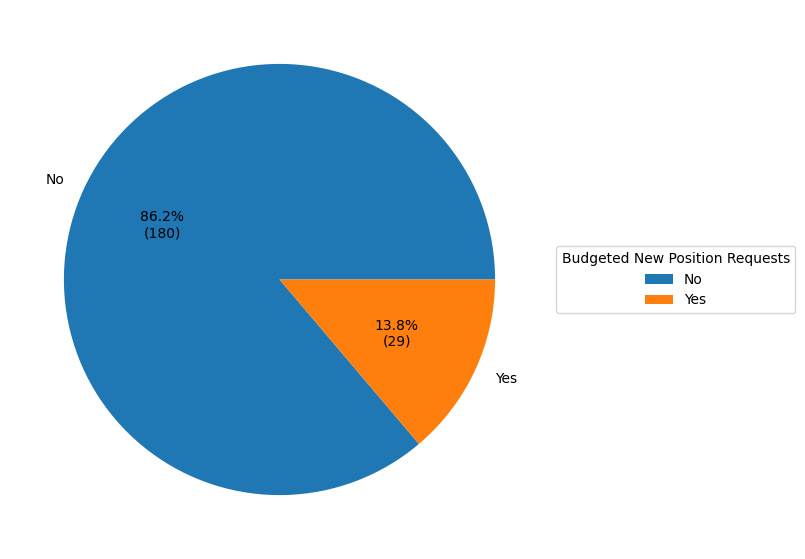

In [ ]:
#pie chart showing the breakout for number of new position requests approved in annual budgets

approve = ['No', 'Yes']
new = [181, 29]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(new, autopct=lambda pct: func(pct, new), labels=approve)

ax.legend(approve, title="Budgeted New Position Requests", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Question:
    What faculty position request type has the highest number of unbudgeted positions?

Findings:
    New position type requests accounted for 209 of the 296 total postition requests submitted and an overall 180 unbudgeted positions accounting for 86% of the New positions.  Replacement position type requests contributed only 20 of an overall 201 number of unbudgeted positions.

Conclusion:
    New faculty position request type had the highest number of positions that were not approved in the annual budget prior to initiation of the request to open the postion for hire.

Recommendations:
    Further analyses should be conducted to determine the statistical significance of the difference between New and Replacement unbudgeted positions.  Analyses of the breakdown of reported funding sources for positions may provide further insight into why New positions are not being approved in the annual budget prior to inititating the request to hire.
